# Some in class examples

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn import metrics

## Single variable Linear Regression

In [8]:
# Generate Fake Data
# One-dimensional feature X and target y
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)

# Put into DataFrame for Plotly Express
df = pd.DataFrame({
    "X": X[:, 0],
    "y": y
})

df

,X,y
0,1.097627,6.127731
1,1.430379,9.191963
2,1.205527,8.082243
3,1.089766,5.733055
4,0.847310,8.030181
...,...,...
95,0.366383,5.780743
96,1.173026,6.715668
97,0.040215,3.431095
98,1.657880,8.518108


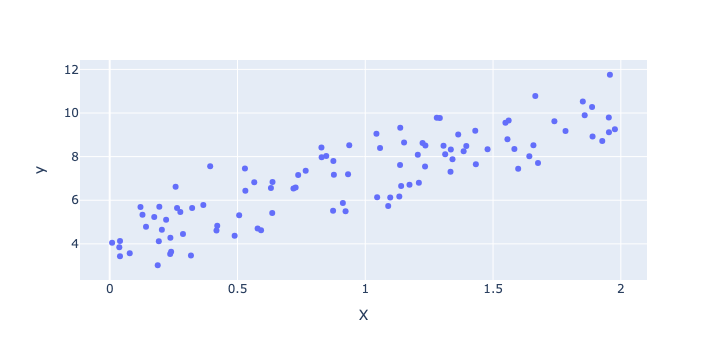

In [9]:
px.scatter(df, x='X',y='y')

In [10]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
# Print model parameters
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


Intercept: 4.222151077447228
Coefficient: 2.9684675107010197


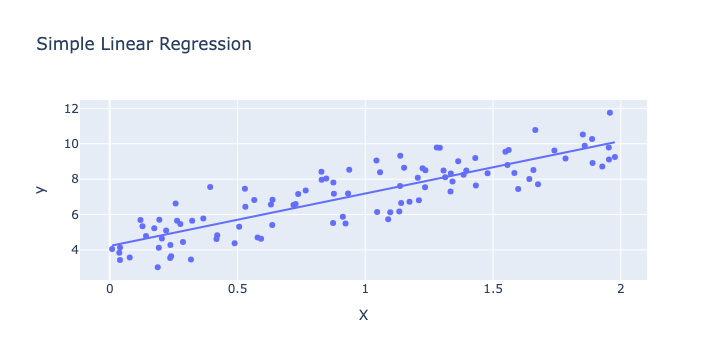

Intercept: 4.222151077447228
Coefficient: 2.9684675107010197
New data point: [[0.2]]
Prediction for new_data: [4.81584458]
R^2 value = 0.7469629925504755


In [12]:
# Predicted values for line of best fit
df["y_pred"] = model.predict(X)

# Plot
fig = px.scatter(df, x="X", y="y", title="Simple Linear Regression")

# Add line of best fit
fig.add_traces(
    px.line(df.sort_values("X"), x="X", y="y_pred").data
)

fig.show()

# Print model parameters
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])


# Predict new data
new_data = np.array([[0.2]])
prediction = model.predict(new_data)
print(f'New data point: {new_data}')
print("Prediction for new_data:", prediction)

# Check the score
print(f'R^2 value = {model.score(X,y)}')

## Multi-variable Linear Regression

In [13]:
# Generate Fake Data
np.random.seed(0)
n_samples = 200

# Three features
X1 = np.random.rand(n_samples)
X2 = 2 * np.random.rand(n_samples)
X3 = 0.5 * np.random.rand(n_samples)

# True relationship (for reproducibility)
y = 5 + 2.0*X1 + 3.0*X2 - 1.5*X3 + np.random.randn(n_samples)

# Combine features into a matrix
X = np.column_stack([X1, X2, X3])

# Put into DataFrame for Plotly Express
df = pd.DataFrame({
    "X1": X1,
    "X2": X2,
    "X3": X3,
    "y": y
})

df

,X1,X2,X3,y
0,0.548814,0.623592,0.200630,7.149939
1,0.715189,1.392687,0.464646,8.932641
2,0.602763,0.755504,0.049807,7.958137
3,0.544883,0.359207,0.472651,6.639751
4,0.423655,0.049357,0.434744,4.840449
...,...,...,...,...
195,0.490459,1.917965,0.498981,11.436054
196,0.227415,0.710738,0.181095,7.248125
197,0.254356,0.713414,0.235324,5.977572
198,0.058029,0.032657,0.189123,4.559641


In [14]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
#  Model Parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)   # Corresponds to [X1, X2, X3]

Intercept: 5.097540728980489
Coefficients: [ 1.50125351  2.9572109  -1.28495279]


In [16]:
#  Model Parameters
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)   # Corresponds to [X1, X2, X3]

# Make Prediction
new_data = np.array([[0.2, 1.0, 0.3]])
prediction = model.predict(new_data)
print(f'New data point: {new_data}')
print("Prediction for new_data:", prediction)

# Check Score
print(f'R^2 value = {model.score(X,y)}')

Intercept: 5.097540728980489
Coefficients: [ 1.50125351  2.9572109  -1.28495279]
New data point: [[0.2 1.  0.3]]
Prediction for new_data: [7.96951649]
R^2 value = 0.7577481994033988


I can't easily plot the result because I have more variables. I have to rely on the numbers coming out of the model!

## Linear Regression with Dummies

In [23]:
file_name = '../Day17/data/allbacks.csv'
DF = pd.read_csv(file_name)

In [24]:
DF

,volume,area,weight,cover
0,885,382,800,hb
1,1016,468,950,hb
2,1125,387,1050,hb
3,239,371,350,hb
4,701,371,750,hb
5,641,367,600,hb
6,1228,396,1075,hb
7,412,0,250,pb
8,953,0,700,pb
9,929,0,650,pb


In [25]:
DF_old = DF

In [26]:
DF = pd.get_dummies(DF, columns=['cover'],dtype=float)
DF

,volume,area,weight,cover_hb,cover_pb
0,885,382,800,1.0,0.0
1,1016,468,950,1.0,0.0
2,1125,387,1050,1.0,0.0
3,239,371,350,1.0,0.0
4,701,371,750,1.0,0.0
5,641,367,600,1.0,0.0
6,1228,396,1075,1.0,0.0
7,412,0,250,0.0,1.0
8,953,0,700,0.0,1.0
9,929,0,650,0.0,1.0


In [27]:
X = DF[['volume','cover_hb','cover_pb']].values.reshape(-1,3)
y = DF['weight']

# Do the regression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [28]:
model.coef_

array([  0.71795374,  92.02363569, -92.02363569])

In [29]:
model.intercept_

np.float64(105.93920788192202)

So what is our equaton

y = 105.9 + 0.718 (volume) + 92.02 (hb) - 92.02 (pb)

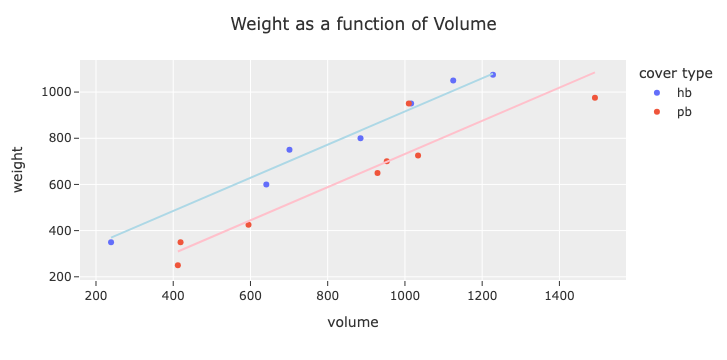

In [30]:
DF['prediction_new'] = model.predict(X)
fig = px.scatter(DF,x='volume',y='weight',color=DF_old['cover'])

# Prediction for when cover_enc = 0
mask = DF['cover_hb']==1
fig.add_trace(
    px.line(DF[mask], x='volume', y='prediction_new',color_discrete_sequence=['lightblue']).data[0]
)

# Prediction for when cover_enc = 1
mask = DF['cover_pb']==1
fig.add_trace(
    px.line(DF[mask], x='volume', y='prediction_new',color_discrete_sequence=['pink']).data[0]
)

fig.update_layout(template="ggplot2",
                  title='Weight as a function of Volume',
                  title_x=0.5,
                  legend_title='cover type')

fig.show()

## Classification with Logistic Regression

In [31]:
# Fake Data
X, y = make_classification(
    n_samples=300,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=0
)

df = pd.DataFrame({
    "x": X[:, 0],
    "class": y.astype(str)
})

df

,x,class
0,-2.251939,0
1,2.130739,1
2,-2.131684,0
3,-1.712037,0
4,2.224335,1
...,...,...
295,-2.276037,0
296,2.328455,1
297,-1.507591,0
298,2.451643,1


In [32]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

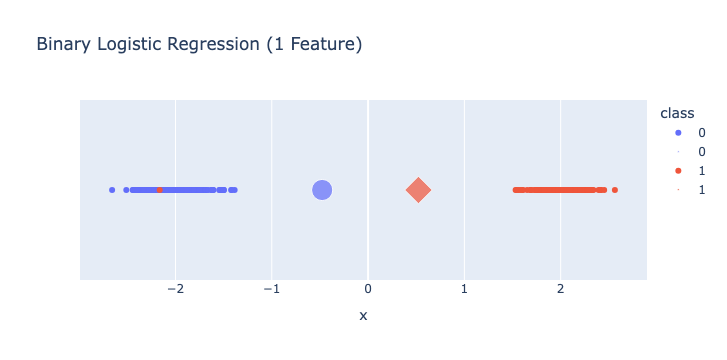

In [33]:
x_mean = X.mean()
new_points = np.array([
    [x_mean - .5],
    [x_mean + .5]
])

pred_class = model.predict(new_points)
pred_prob = model.predict_proba(new_points)[:, 1]  # probability of class 1

df_new = pd.DataFrame({
    "x": new_points[:, 0],
    "pred_class": pred_class.astype(str),
    "prob_class1": pred_prob
})

df_new = pd.DataFrame({
    "x": new_points[:, 0],
    "pred_class": pred_class.astype(str),
    "prob_class1": pred_prob
})

# Ploe
fig = px.scatter(
    df,
    x="x",
    y=[0]*len(df),
    color="class",
    title="Binary Logistic Regression (1 Feature)"
)

# Add predictions (with small markers)
fig.add_traces(
    px.scatter(
        df_new,
        x="x",
        y=[0]*len(df_new),
        color="pred_class",
        symbol="pred_class",
        size=[1]*len(df_new),
        size_max=15
    ).data
)

fig.update_yaxes(visible=False)
fig.show()


In [34]:
cutoffs = [0.2, 0.50, 0.8]
results = {}

for c in cutoffs:
    results[f"cutoff_{c}"] = (pred_prob > c).astype(int)

cutoff_df = pd.DataFrame(results)
cutoff_df.insert(0, "x_value", new_points[:, 0])

print("\n--- Probability of Class 1 on new points ---")
print(pred_prob)

print("\n--- Decisions for various cutoffs (1 = Class 1 predicted) ---")
print(cutoff_df)


--- Probability of Class 1 on new points ---
[0.2342619  0.75440023]

--- Decisions for various cutoffs (1 = Class 1 predicted) ---
    x_value  cutoff_0.2  cutoff_0.5  cutoff_0.8
0 -0.476696           1           0           0
1  0.523304           1           1           0


## Classification with Logistic Regression Multi Class

In [38]:
# Generate Fake Data
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=0
)

df = pd.DataFrame({
    "x1": X[:, 0],
    "x2": X[:, 1],
    "class": y.astype(str)  # string labels for coloring
})

df

,x1,x2,class
0,1.365362,1.198466,1
1,0.742764,0.958077,1
2,0.988395,0.714877,1
3,0.545628,-2.218648,0
4,-0.372337,-2.685247,0
...,...,...,...
295,1.059791,0.411818,1
296,2.163576,0.604718,1
297,2.573267,2.339409,0
298,1.290444,1.485560,1


In [36]:
# Classification use Logistic Regression
model = LogisticRegression()
model.fit(X, y)


print('Classes:')
print(model.classes_)
print('Coefficients:')
print(model.coef_)
print('Intercept:')
print(model.intercept_)

Classes:
[0 1]
Coefficients:
[[-2.12579509  2.99705286]]
Intercept:
[1.48427469]


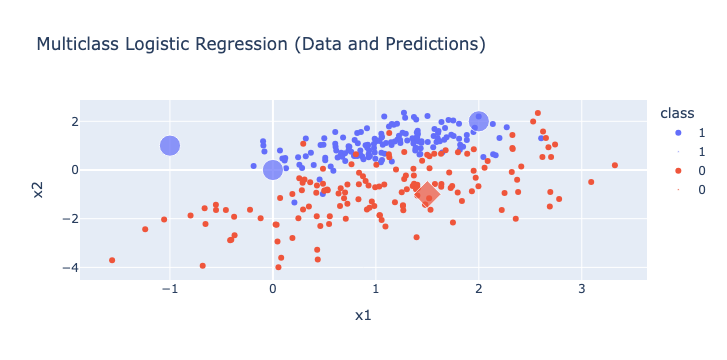

Intercepts: [1.48427469]
Coefficients: [[-2.12579509  2.99705286]]
Accuracy = 0.92


In [37]:
# Some New Data
new_points = np.array([
    [0, 0],
    [1.5, -1],
    [-1, 1],
    [2, 2]
])

# Make Predictions
new_pred = model.predict(new_points)

# Put the new data into Data Frame
df_new = pd.DataFrame({
    "x1": new_points[:, 0],
    "x2": new_points[:, 1],
    "pred_class": new_pred.astype(str)
})

# Plot the Data
fig = px.scatter(
    df,
    x="x1",
    y="x2",
    color="class",
    title="Multiclass Logistic Regression (Data and Predictions)"
)

# Add the predictions
fig.add_traces(
    px.scatter(
        df_new,
        x="x1",
        y="x2",
        color="pred_class",
        symbol="pred_class",
        size=[1]*len(df_new),
        size_max = 15# bigger markers for predictions
    ).data
)

fig.show()

# Model Parameters
print("Intercepts:", model.intercept_)
print("Coefficients:", model.coef_)

# Check the score
print(f'Accuracy = {model.score(X,y)}')

In [87]:
cnf_matrix = metrics.confusion_matrix(y, model.predict(X))
cnf_matrix

array([[132,  17],
       [  7, 144]])

In [88]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[0,1] 
FN = cnf_matrix[1,0] 
TN = cnf_matrix[1,1]

In [89]:
model.predict_proba(X)[0]

array([0.10214075, 0.89785925])

In [90]:
model.predict(X)[0]

np.int64(1)